In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

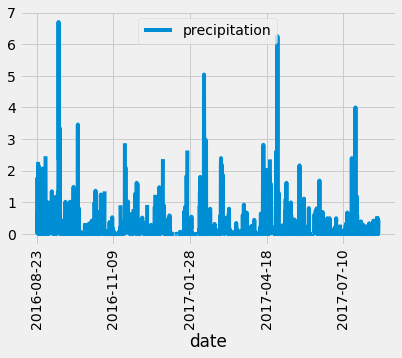

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [30]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.his

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
5    73.0
6    78.0
7    77.0
8    78.0
9    80.0
10   80.0
11   78.0
12   78.0
13   78.0
14   73.0
15   74.0
16   80.0
17   79.0
18   77.0
19   80.0
20   76.0
21   79.0
22   75.0
23   79.0
24   78.0
25   79.0
26   78.0
27   78.0
28   76.0
29   74.0
30   77.0
31   78.0
32   79.0
33   79.0
34   77.0
35   80.0
36   78.0
37   78.0
38   78.0
39   77.0
40   79.0
41   79.0
42   79.0
43   79.0
44   75.0
45   76.0
46   73.0
47   72.0
48   71.0
49   77.0
50   79.0
51   78.0
52   79.0
53   77.0
54   79.0
55   77.0
56   78.0
57   78.0
58   78.0
59   78.0
60   77.0
61   74.0
62   75.0
63   76.0
64   73.0
65   76.0
66   74.0
67   77.0
68   76.0
69   76.0
70   74.0
71   75.0
72   75.0
73   75.0
74   75.0
75   71.0
76   63.0
77   70.0
78   68.0
79   67.0
80   77.0
81   74.0
82   77.0
83   76.0
84   76.0
85   75.0
86   76.0
87   75.0
88   73.0
89   75.0
90   73.0
91   75.0
92   74.0
93   75.0
94   74.0
95   75.0
96   73.0
97   75.0
98   73.0


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge